In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully ✅")


Libraries loaded successfully ✅


In [22]:
df = pd.read_csv("house_prices.csv")
df.head()


,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [23]:
print(df.columns)
print(df.isnull().sum())


Index(['Property_ID', 'Area', 'Bedrooms', 'Bathrooms', 'Age', 'Location',
       'Property_Type', 'Price'],
      dtype='object')
Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64


In [24]:
X = df.drop("Price", axis=1)
y = df["Price"]

X.head(), y.head()


(  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type
 0    PROP0001  3712         4          3   36        Rural         House
 1    PROP0002  1591         4          1   35       Suburb         House
 2    PROP0003  1646         4          3   20        Rural         Villa
 3    PROP0004  4814         1          2   13  City Center         Villa
 4    PROP0005   800         4          2   38       Suburb     Apartment,
 0    22260000
 1    16057500
 2    12730000
 3    50840000
 4    10650000
 Name: Price, dtype: int64)

In [25]:
numeric_features = ["Area", "Bedrooms", "Bathrooms", "Age"]
categorical_features = ["Location", "Property_Type"]


In [26]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

model.fit(X_train, y_train)
print("Model trained successfully ✅")


Model trained successfully ✅


In [29]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ₹{mae:,.2f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error: ₹1,436,717.50
R² Score: 0.974


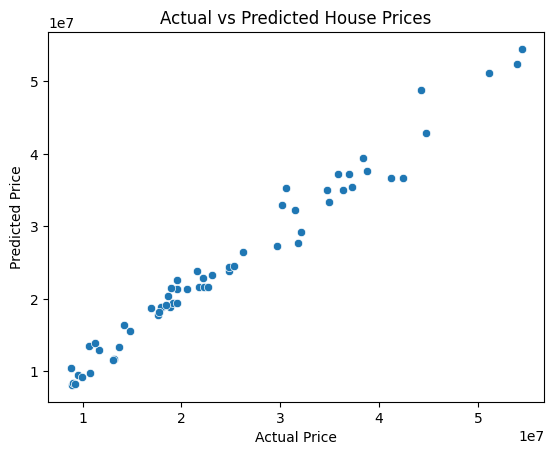

In [30]:
plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()
